In [1]:
# extract top locations and reasons from feature files

def get_top(xs, n):
    
    x_all = [x_ for x in xs for x_ in x]
    x_uniq = list(set(x_all))
    
    freq = []
    for i in range(len(x_uniq)):
        freq.append(0)
        for j in range(len(xs)):
            if x_uniq[i] in xs[j]:
                freq[i] += 1

    ind_sort = sorted(range(len(freq)), key=lambda k: freq[k], reverse=True)
    freq_sorted = [freq[i] for i in ind_sort]
    x_uniq_sorted = [x_uniq[i] for i in ind_sort]

    freq_top = freq_sorted[:n]
    x_top = x_uniq_sorted[:n]

    return x_top, freq_top

In [2]:
import pandas as pd
import os
from preprocess import *
import pickle

data_dir = 'features/'

files = os.listdir(data_dir)

locations = []
reasons = []
for filename in files:

    with open(data_dir+filename) as f:
        _, target = pickle.load(f)
    f.close()
    
    location = list(target['location'])
    for (i,_) in enumerate(location):
        location[i] = preprocess_location(location[i])
    locations.append(location)
    
    reason = list(target['reason'])
    for (i,_) in enumerate(reason):
        reason[i] = preprocess_reason(reason[i])
    reasons.append(reason)

reason_all = [r for r1 in reasons for r in r1]
location_all = [l for l1 in locations for l in l1]

(-1, 20)

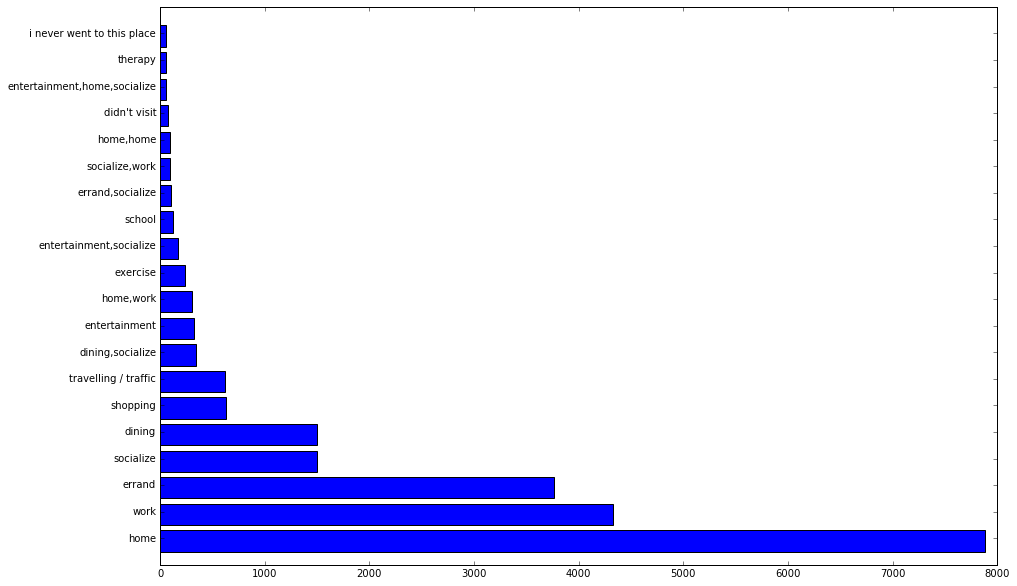

In [3]:
# overall frequency

reason_uniq = list(set(reason_all))
freq = [reason_all.count(x) for x in reason_uniq]

ind_sort = sorted(range(len(freq)), key=lambda k: freq[k], reverse=True)
freq_sorted = [freq[x] for x in ind_sort]
reason_uniq_sorted = [reason_uniq[x] for x in ind_sort]

freq_sorted_top = freq_sorted[:20]
reason_uniq_sorted_top = reason_uniq_sorted[:20]

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(15,10))
plt.barh(np.arange(len(freq_sorted_top))-.5, np.array(freq_sorted_top));
plt.yticks(np.arange(len(freq_sorted_top)), reason_uniq_sorted_top);
plt.ylim(-1,len(freq_sorted_top))

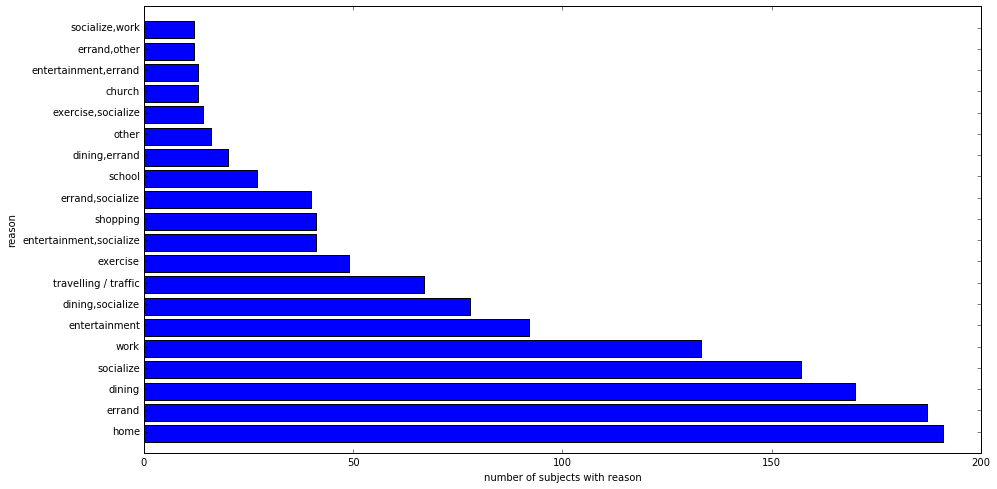

In [4]:
# subject-wise frequency for reason

reason_uniq_sorted_top, freq_sorted_top = get_top(reasons, 20)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(15,8))
plt.barh(np.arange(len(freq_sorted_top))-.5, np.array(freq_sorted_top));
plt.yticks(np.arange(len(freq_sorted_top)), reason_uniq_sorted_top);
plt.ylim(-1,len(freq_sorted_top))
plt.xlabel('number of subjects with reason')
plt.ylabel('reason')


In [ ]:
print reason_parsed

In [5]:
# subject-wise frequency for location

location_uniq_sorted_top, _ = get_top(locations, 20)

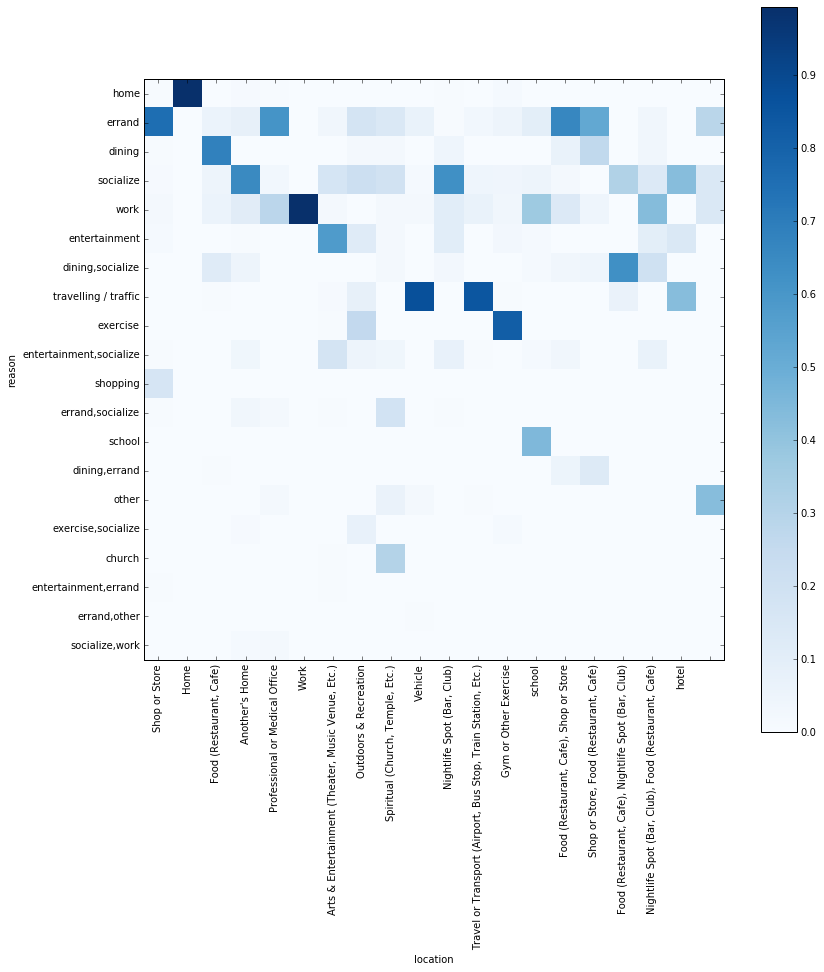

In [7]:
img = np.zeros([len(reason_uniq_sorted_top),len(location_uniq_sorted_top)])
for (i,_) in enumerate(reason_all):
    if reason_all[i] in reason_uniq_sorted_top and location_all[i] in location_uniq_sorted_top:
        ind_res = reason_uniq_sorted_top.index(reason_all[i])
        ind_loc = location_uniq_sorted_top.index(location_all[i])
        img[ind_res,ind_loc] += 1
#img_normalized = img.astype('float') / img.sum(axis=1)[:, np.newaxis]        
img_normalized = img.astype('float') / img.sum(axis=0)[np.newaxis,:]

plt.figure(figsize=(13,13))
plt.imshow(img_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.yticks(np.arange(len(reason_uniq_sorted_top)),reason_uniq_sorted_top)
plt.xticks(np.arange(len(location_uniq_sorted_top)),location_uniq_sorted_top,rotation=90)
plt.xlabel('location')
plt.ylabel('reason')
#plt.title()
plt.colorbar()


In [ ]:
len(reason_all)